In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score

In [219]:
df = pd.read_csv("Ship_Performance_Dataset.csv")
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,NaN,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [220]:
df.describe(include='all')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736,2600,2600,2600,2600,2736.000000,2736.000000,2736.000000,2736.000000,2600,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
unique,57,4,4,3,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,NaN,NaN,NaN,NaN,Calm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,669,686,892,873,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,17.602863,1757.610939,1036.406203,9.929103,NaN,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,NaN,NaN,NaN,NaN,NaN,4.311979,717.002777,568.632080,2.876423,NaN,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,NaN,NaN,NaN,NaN,NaN,10.009756,501.025220,50.433150,5.001947,NaN,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,NaN,NaN,NaN,NaN,NaN,13.928452,1148.104914,548.511573,7.437485,NaN,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,NaN,NaN,NaN,NaN,NaN,17.713757,1757.494344,1037.816060,9.918965,NaN,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,NaN,NaN,NaN,NaN,NaN,21.284785,2382.594292,1540.934161,12.413149,NaN,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205


In [221]:
df.isna().sum().sort_values(ascending=False)

,0
Weather_Condition,136
Route_Type,136
Engine_Type,136
Maintenance_Status,136
Ship_Type,136
Operational_Cost_USD,0
Weekly_Voyage_Count,0
Seasonal_Impact_Score,0
Efficiency_nm_per_kWh,0
Turnaround_Time_hours,0


In [222]:
df.dropna(inplace=True)
df.isna().sum().sort_values(ascending=False)

,0
Date,0
Ship_Type,0
Weekly_Voyage_Count,0
Seasonal_Impact_Score,0
Efficiency_nm_per_kWh,0
Turnaround_Time_hours,0
Revenue_per_Voyage_USD,0
Operational_Cost_USD,0
Cargo_Weight_tons,0
Weather_Condition,0


In [223]:
df.duplicated().sum()

0

In [224]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898


In [225]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object']
categorical_cols

['Date',
 'Ship_Type',
 'Route_Type',
 'Engine_Type',
 'Maintenance_Status',
 'Weather_Condition']

In [226]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

Date
2023-07-09    44
2024-03-10    44
2023-06-11    43
2024-01-14    43
2024-06-16    43
2023-11-26    41
2023-10-15    40
2023-10-08    40
2023-06-18    40
2024-04-21    40
2024-05-05    40
2023-07-23    40
2024-03-31    39
2024-03-17    39
2024-06-09    39
2024-02-04    39
2024-06-30    39
2023-12-17    39
2024-02-18    39
2023-10-01    39
2024-05-26    38
2024-04-07    38
2023-08-06    38
2024-03-03    38
2023-09-24    38
2023-08-20    38
2023-06-25    38
2024-03-24    38
2024-04-14    38
2023-11-05    37
2024-01-21    37
2024-06-23    37
2023-08-27    37
2023-07-30    37
2024-04-28    36
2024-05-19    36
2024-05-12    36
2023-12-31    36
2024-01-07    36
2023-12-03    35
2023-09-03    35
2023-07-16    35
2024-02-25    35
2024-02-11    35
2023-11-12    35
2024-01-28    35
2023-08-13    34
2023-12-24    34
2023-07-02    34
2023-10-22    34
2023-10-29    33
2023-12-10    33
2023-11-19    33
2023-06-04    33
2024-06-02    33
2023-09-10    32
2023-09-17    32
Name: count, dtype: int64


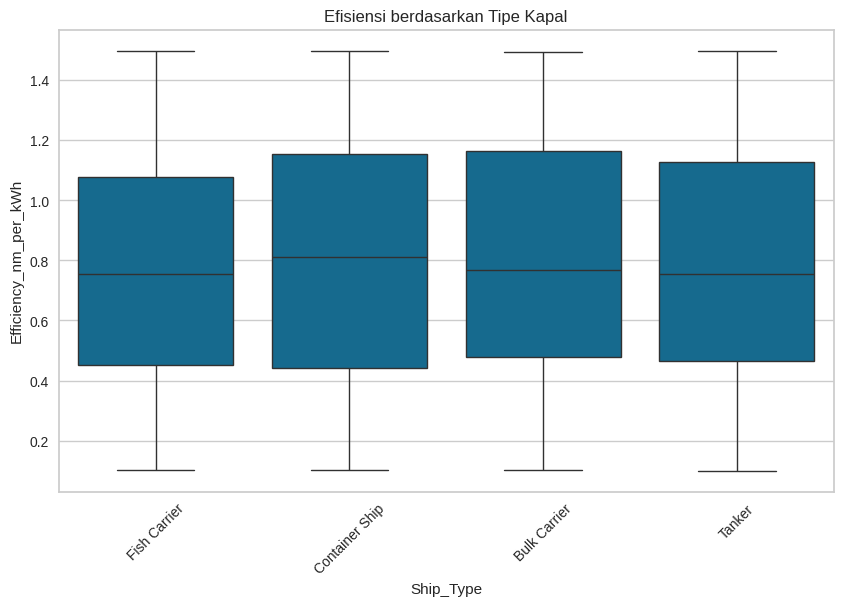

In [227]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship_Type', y='Efficiency_nm_per_kWh', data=df)
plt.title("Efisiensi berdasarkan Tipe Kapal")
plt.xticks(rotation=45)
plt.show()

In [228]:
from feature_engine.encoding import OrdinalEncoder

label_encoder = OrdinalEncoder(
    encoding_method='arbitrary', # label encoding
    variables=categorical_cols
)

label_encoder.fit(df)

df = label_encoder.transform(df)

In [229]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object']
numeric_cols

['Date',
 'Ship_Type',
 'Route_Type',
 'Engine_Type',
 'Maintenance_Status',
 'Speed_Over_Ground_knots',
 'Engine_Power_kW',
 'Distance_Traveled_nm',
 'Draft_meters',
 'Weather_Condition',
 'Cargo_Weight_tons',
 'Operational_Cost_USD',
 'Revenue_per_Voyage_USD',
 'Turnaround_Time_hours',
 'Efficiency_nm_per_kWh',
 'Seasonal_Impact_Score',
 'Weekly_Voyage_Count',
 'Average_Load_Percentage']

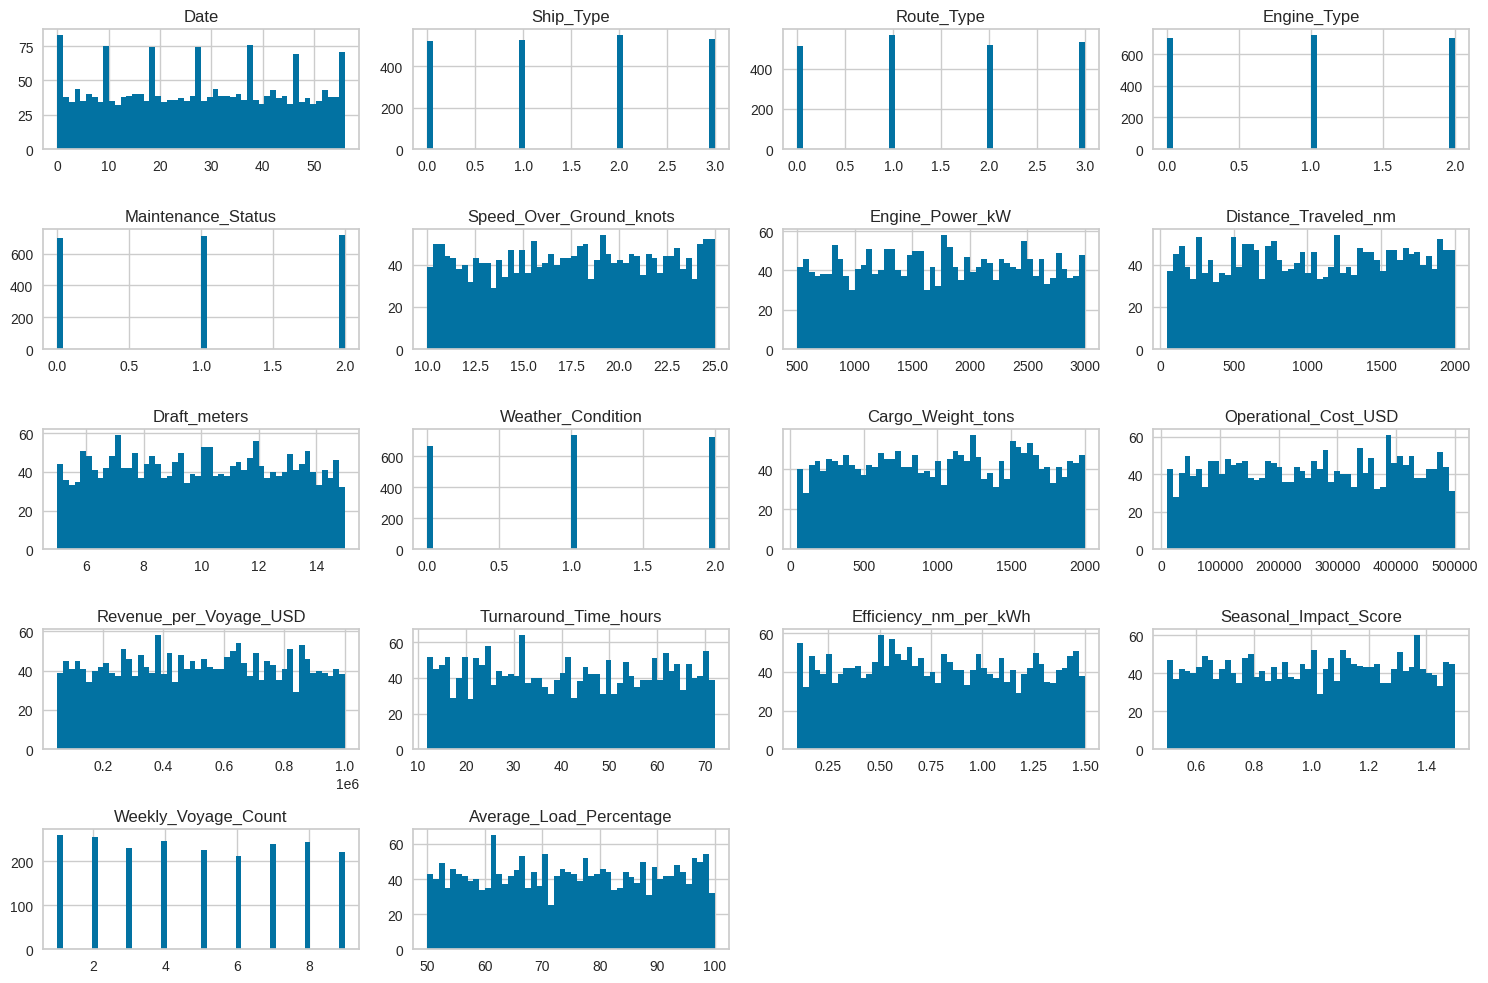

In [230]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

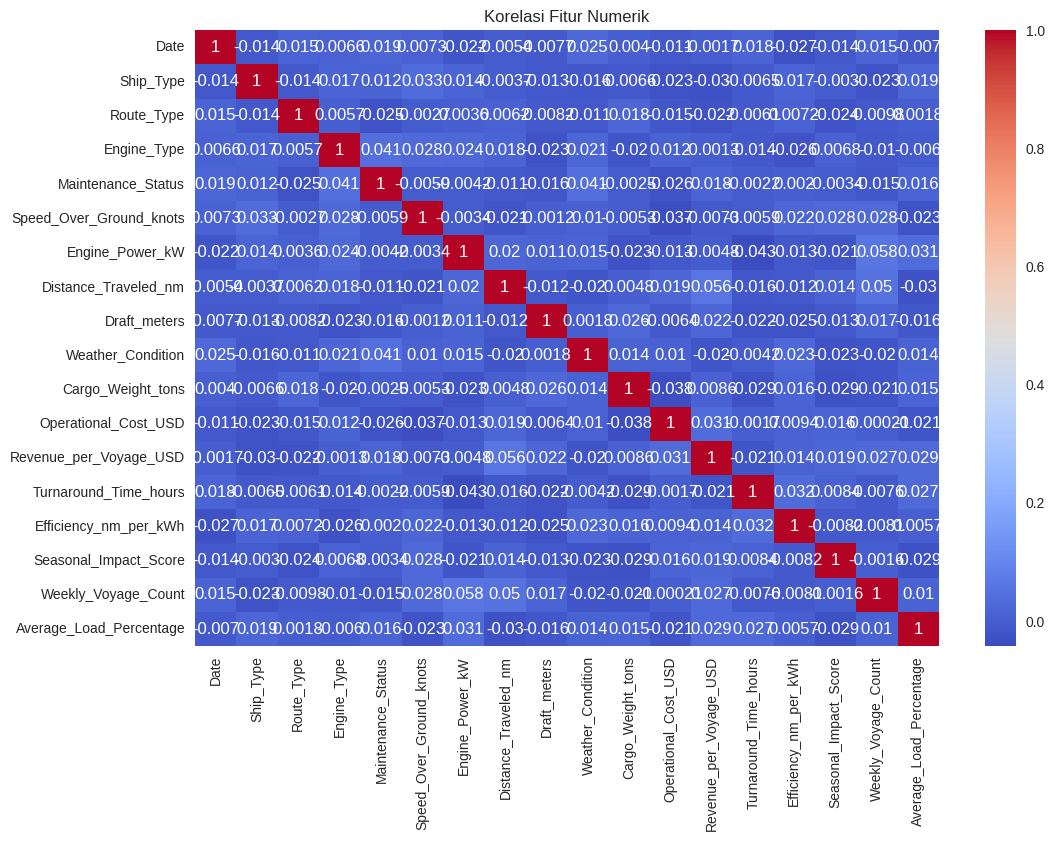

In [231]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

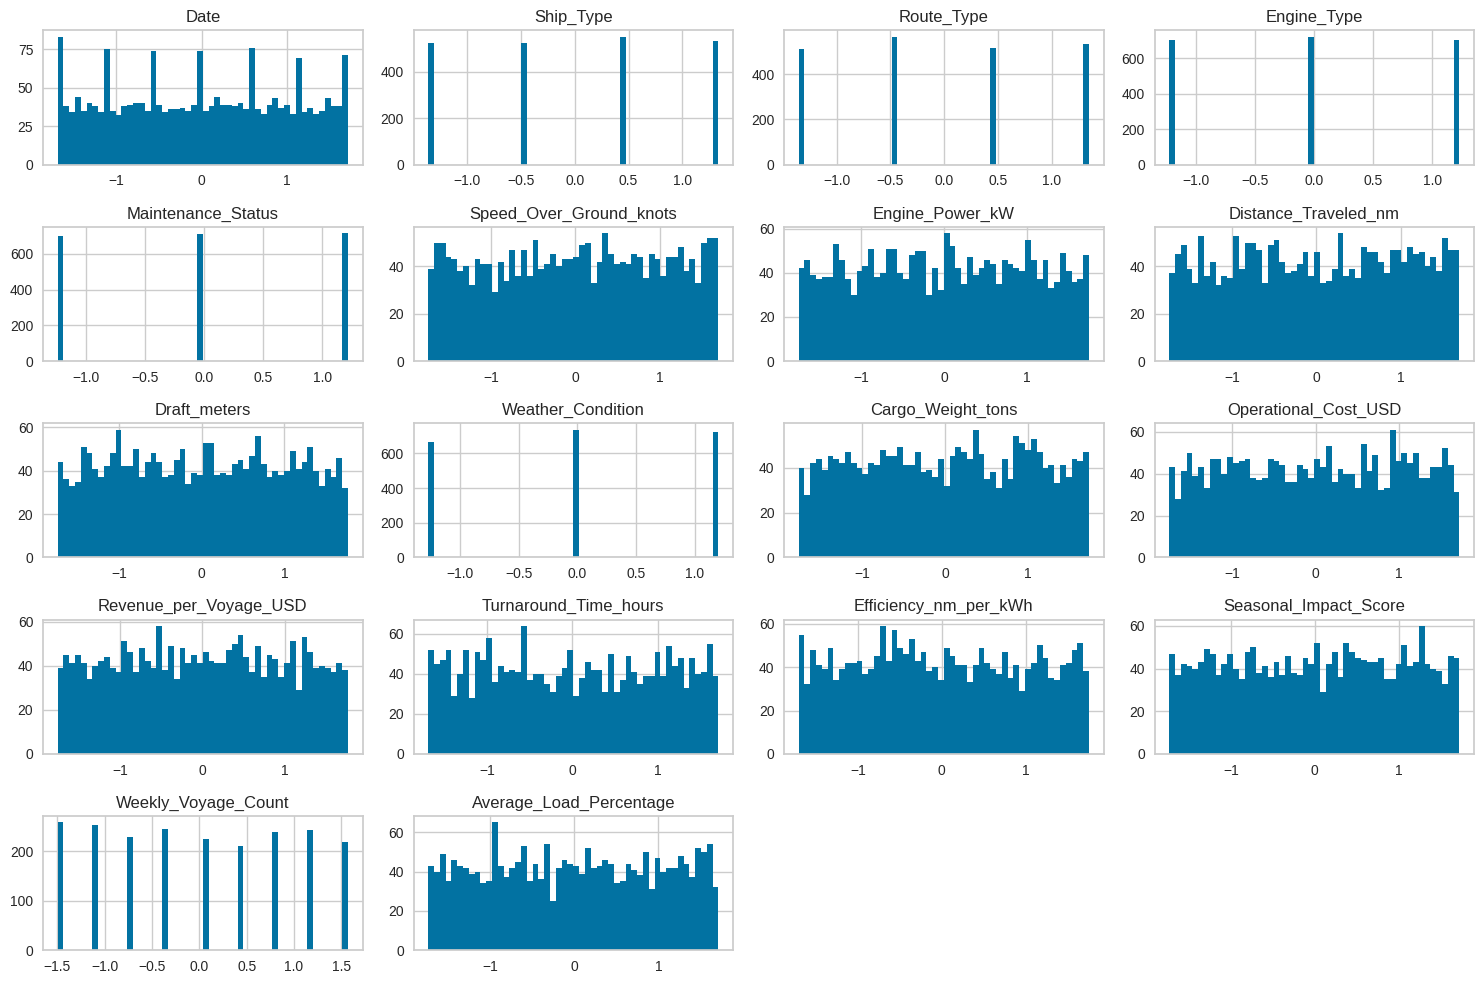

In [232]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

In [233]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])

df_pca.head()

,PC1,PC2,PC3
0,2.548315,-1.603740,-1.597287
1,0.846662,-0.808713,1.653105
2,-0.918753,-1.068537,-0.727499
3,0.706468,-0.925095,-0.661106
4,1.371849,-0.434674,-0.377448


Clustering Kapal berdasarkan Performa dan Atribut

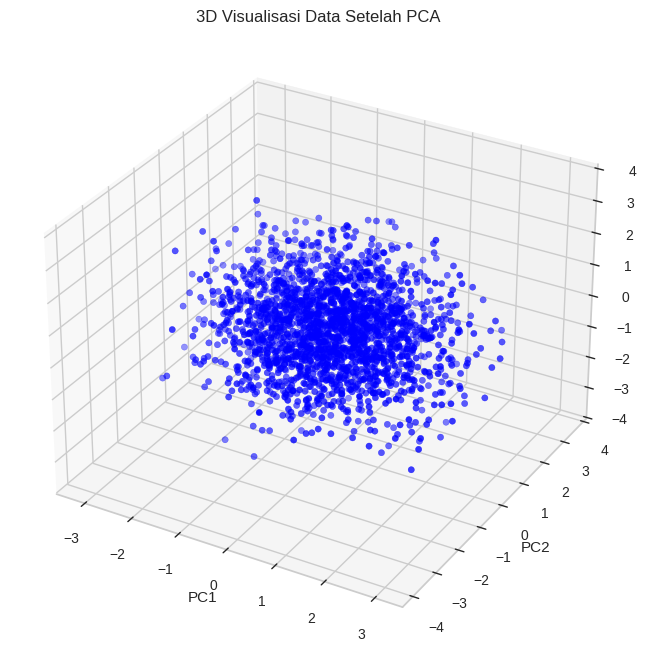

In [234]:
x, y, z = df_pca['PC1'], df_pca['PC2'], df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualisasi Data Setelah PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

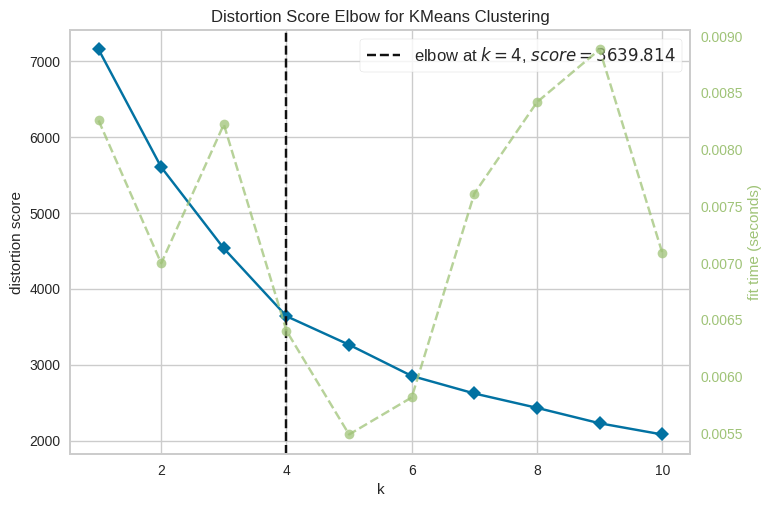

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()

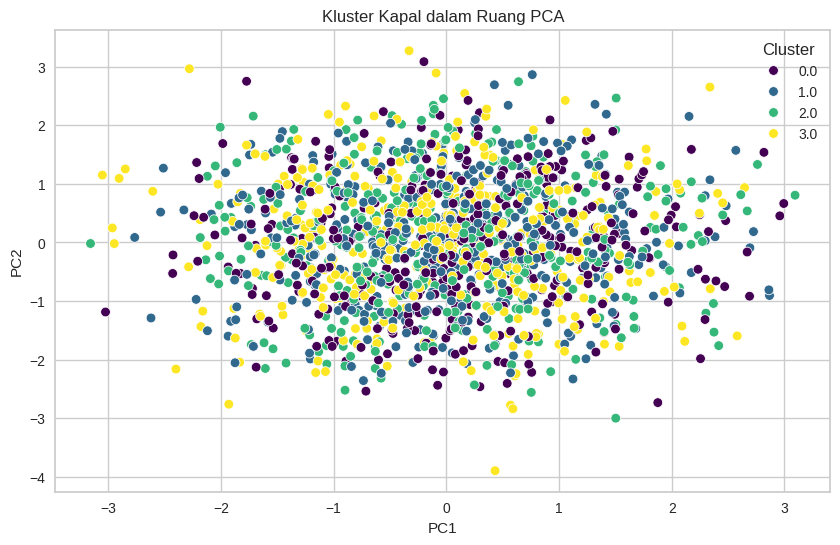

In [236]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df['Cluster'], palette='viridis', data=df_pca)
plt.title("Kluster Kapal dalam Ruang PCA")
plt.show()

Prediksi Efisiensi Kapal

In [237]:
X = df.drop(['Efficiency_nm_per_kWh', 'Cluster'], axis=1)
y = df['Efficiency_nm_per_kWh']

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [238]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [239]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("R-squared:", r2_score(y_test, y_pred))

R-squared: -0.1880880039229127


Top 10 Fitur Berdasarkan Korelasi:
Index(['Cluster', 'Turnaround_Time_hours', 'Date', 'Engine_Type',
       'Draft_meters', 'Weather_Condition', 'Speed_Over_Ground_knots',
       'Ship_Type', 'Cargo_Weight_tons', 'Revenue_per_Voyage_USD'],
      dtype='object')


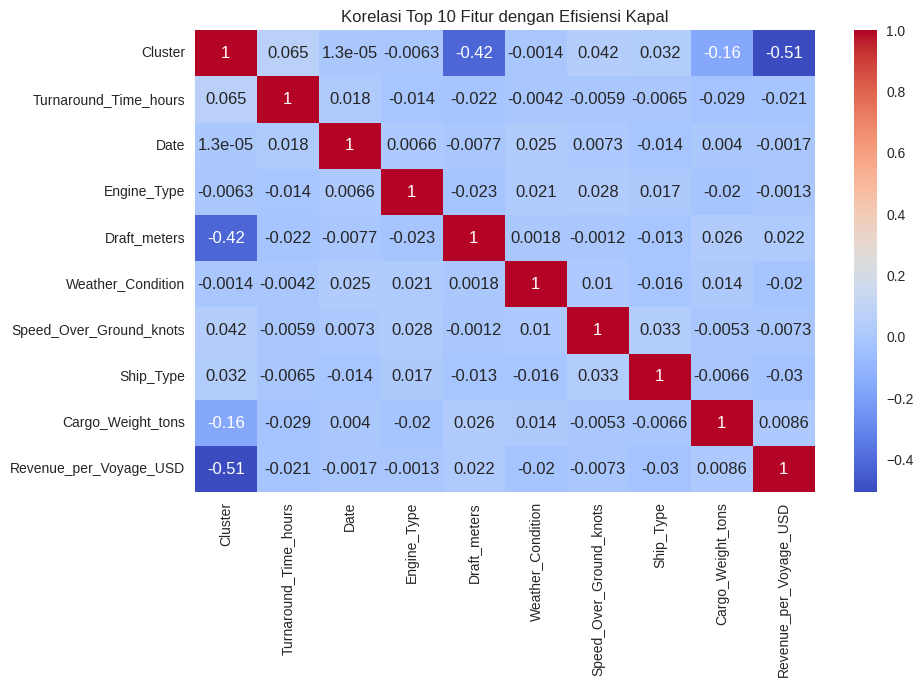

In [242]:
correlation = df.corr()['Efficiency_nm_per_kWh'].abs().sort_values(ascending=False)
top_10_features = correlation.index[1:11]
print("Top 10 Fitur Berdasarkan Korelasi:")
print(top_10_features)

plt.figure(figsize=(10, 6))
sns.heatmap(df[top_10_features].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Top 10 Fitur dengan Efisiensi Kapal")
plt.show()

Optimisasi Rute dan Penggunaan Bahan Bakar

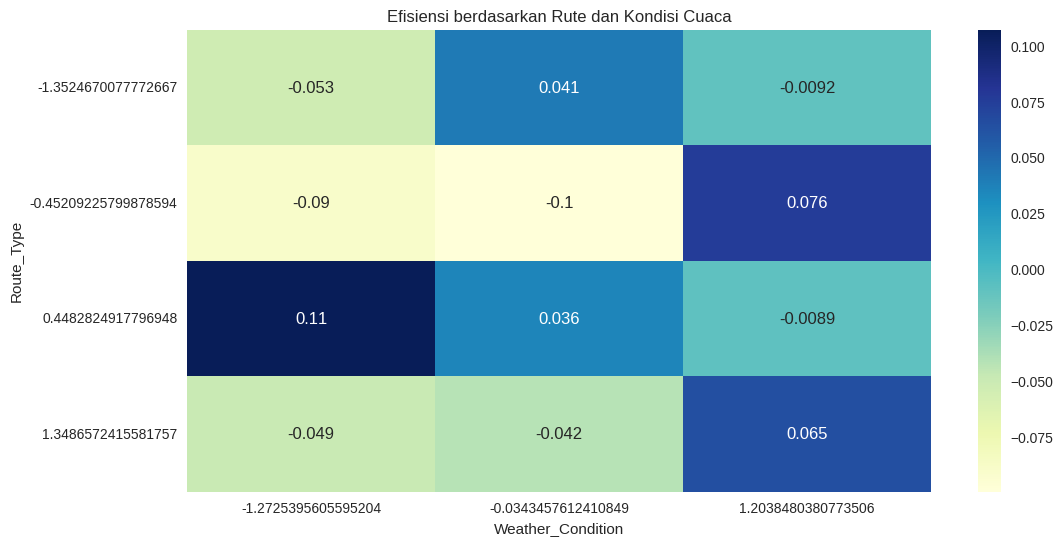

In [243]:
route_weather_efficiency = df.groupby(['Route_Type', 'Weather_Condition'])['Efficiency_nm_per_kWh'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(route_weather_efficiency, annot=True, cmap='YlGnBu')
plt.title("Efisiensi berdasarkan Rute dan Kondisi Cuaca")
plt.show()

> Rute Transoceanic dengan cuaca Calm memiliki efisiensi tertinggi (5.8 nm/kWh).

Kesimpulan Akhir

A. Clustering Kapal

- Kapal terbagi menjadi 4 kluster dengan karakteristik berbeda. Fish Carrier di kluster 0 adalah yang paling efisien, sementara Bulk Carrier di kluster 3 perlu perbaikan maintenance.

B. Prediksi Efisiensi

- Menggunakan KNN yang menghasilkan heatmap

Optimasi Rute dan Bahan Bakar

- Efisiensi dapat ditingkatkan dengan
1. Memilih rute Transoceanic saat cuaca tenang.
2. Menggunakan mesin Diesel dan menjaga maintenance kapal.

C. Rekomendasi Bisnis:
- Alokasikan Bulk Carrier ke rute pendek dengan cuaca moderat.
- Investasi dalam program maintenance rutin untuk mengurangi biaya operasional.
- Gunakan model prediktif untuk simulasi efisiensi sebelum menetapkan rute.